**#Harshith Reddy | harshithreddy.ai@gmail.com**

# ***Import required libraries and dataset***

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
file = files.upload()

Saving Ads_CTR_Optimisation.csv to Ads_CTR_Optimisation.csv


In [5]:
import io

dataset = pd.read_csv(io.StringIO(file['Ads_CTR_Optimisation.csv'].decode('utf-8')))

print(dataset.head())

   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


# ***Building the model from scratch***

**model using Thompson Sampling**

In [17]:
import random

N = 10000
d = 10
ad_selected = []
number_of_selections_1 = [0] * d
number_of_selections_0 = [0] * d
total_reward = 0

for n in range(0,N):
  ad = 0
  max_randombeta = 0
  for i in range(0,d):
    randombeta = random.betavariate(number_of_selections_1[i] + 1 , number_of_selections_0[i] + 1)
    if randombeta > max_randombeta:
      max_randombeta = randombeta
      ad = i
      
  ad_selected.append(ad)
  reward = dataset.values[n,ad]
  if reward == 1:
    number_of_selections_1[ad] += 1
  else:
    number_of_selections_0[ad] += 1
  total_reward += reward
  
  
print(total_reward)    

2609


**Thompson Sampling gave better results than UpperConfidenceBound**

# ***Visualise the ads selection probability***

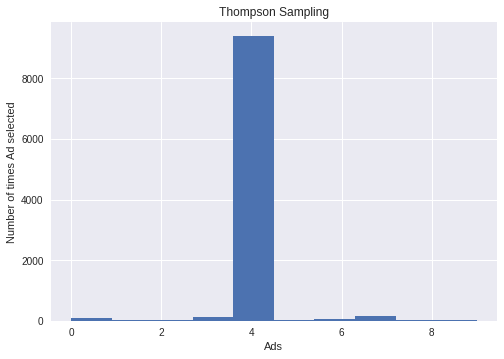

In [18]:
plt.hist(ad_selected)
plt.title('Thompson Sampling')
plt.xlabel('Ads')
plt.ylabel('Number of times Ad selected')
plt.show()

**So the Ad selected by the algorithm is 5th Ad.**